# LINK PARA O VÍDEO: https://youtu.be/hndpZ_c74h8

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import seaborn as sns
import matplotlib.pyplot as plt

### item `a` até o item `d` já feito na atvd 5 e carregado no dataset

In [2]:
df = pd.read_csv('/home/guilherme-sales/Data_Science_UFC_CKP9011_2025.1/data/grouped_atvd5.csv', index_col='Unnamed: 0')

In [3]:
df.head()

,message_cluster,text_content_anonymous,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,...,id_message,message_type,messenger,media_name,media_md5,word_count,texto_limpo,cluster_id,texto,share_count
0,0,Então é Fato Renato o áudio que eu ouvi no wha...,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,...,16385,Texto,telegram,NaN,NaN,20,entao fato renato audio ouvi whatsapp ocorreu ...,0,entao fato renato audio ouvi whatsapp ocorreu ...,1
1,1,"Saiu no YouTube do presidente a 8 horas atrás,...",2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,...,16386,Texto,telegram,NaN,NaN,23,saiu youtube presidente 8 horas atras infelizm...,1,saiu youtube presidente 8 horas atras infelizm...,1
2,2,"É isso, nossa parte já foi quase toda feita. N...",2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,...,16366,Texto,telegram,NaN,NaN,59,parte ja quase toda feita segundo turno comple...,2,parte ja quase toda feita segundo turno comple...,1
3,3,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,...,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,7,gente achei seita maconarica,3,gente achei seita maconarica,1
4,4,Kķkkkkk to rindo até agora....Quem disse q ia ...,2022-10-05 06:28:30,NaN,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,...,2735,Texto,telegram,NaN,NaN,25,kkkkkkk rindo ate agoraquem disse q ia fazer a...,4,kkkkkkk rindo ate agoraquem disse q ia fazer a...,1


In [13]:
df['share_count'].describe()

count    161458.000000
mean          1.200238
std           3.877127
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         982.000000
Name: share_count, dtype: float64

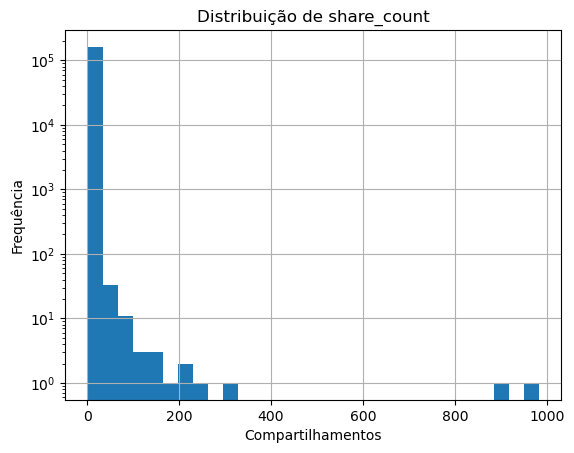

In [19]:
df['share_count'].hist(bins=30)
plt.title("Distribuição de share_count")
plt.xlabel("Compartilhamentos")
plt.ylabel("Frequência")
plt.yscale('log')
plt.show()

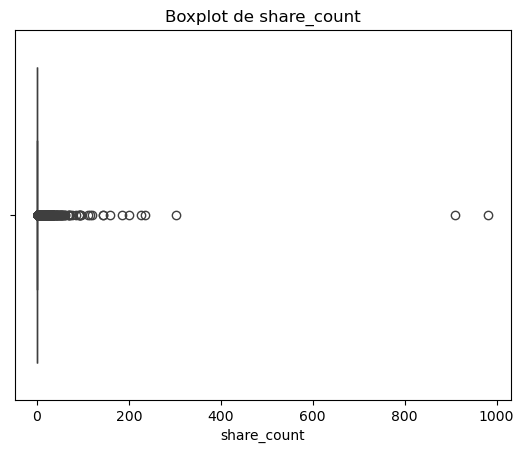

In [20]:
sns.boxplot(x=df['share_count'])
plt.title("Boxplot de share_count")
plt.show()


In [71]:
df = df.dropna(subset=['share_count'])

df_virais = df[df['share_count'] > 1]

q1 = df_virais['share_count'].quantile(0.25)
q2 = df_virais['share_count'].quantile(0.50)
q3 = df_virais['share_count'].quantile(0.75)

def classificar_viralidade(x):
    if x == 1:
        return 0  # Pouco viral
    elif x <= q1:
        return 1  # Moderadamente viral
    elif x <= q2:
        return 2  # Viral
    elif x <= q3:
        return 3  # Muito viral
    else:
        return 4  # Extremamente viral

df['viralidade_label'] = df['share_count'].apply(classificar_viralidade)

In [72]:
print(df['viralidade_label'].value_counts().sort_index())

viralidade_label
0    147388
1      9598
3      2282
4      2190
Name: count, dtype: int64


In [73]:
for col in df.columns:
    u_el = df[col].unique()
    if len(u_el) <= 10:
        print(f'{col} unique:', u_el)
    else:
        print(f"{col} com {df[col].nunique()} valores únicos.")

message_cluster com 161458 valores únicos.
text_content_anonymous com 161458 valores únicos.
date_message com 153244 valores únicos.
id_member_anonymous com 9690 valores únicos.
id_group_anonymous com 173 valores únicos.
media com 39122 valores únicos.
media_type com 29 valores únicos.
media_url com 22503 valores únicos.
has_media unique: [False  True]
has_media_url unique: [False  True]
trava_zap unique: [False]
dataset_info_id unique: [5]
date_system com 161458 valores únicos.
score_sentiment com 7376 valores únicos.
score_misinformation com 79683 valores únicos.
id_message com 128298 valores únicos.
messenger unique: ['telegram']
media_name com 1495 valores únicos.
media_md5 com 39146 valores únicos.
word_count com 708 valores únicos.
texto_limpo com 161457 valores únicos.
cluster_id com 161458 valores únicos.
texto com 161457 valores únicos.
share_count com 76 valores únicos.
viralidade_label unique: [0 1 3 4]
msg_type_Application unique: [False  True]
msg_type_Audio unique: [False

In [24]:
one_hot = pd.get_dummies(df['message_type'], prefix='msg_type')
df = pd.concat([df, one_hot], axis=1)
df.drop('message_type', axis=1, inplace=True)

In [25]:
selected_features = [
    # Numéricos
    'word_count',
    'score_sentiment',
    'score_misinformation',
    
    # Booleanos
    'has_media',
    'has_media_url',

    # One-hot message_type
    'msg_type_Application',
    'msg_type_Audio',
    'msg_type_Image',
    'msg_type_Imagem',
    'msg_type_Text',
    'msg_type_Texto',
    'msg_type_Url',
    'msg_type_Video'
]


In [27]:
df_filtered = df.dropna(subset=selected_features + ['viralidade_label'])

X = df_filtered[selected_features]
y = df_filtered['viralidade_label']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
def avaliar_modelos_multiclasse(X_train, X_test, y_train, y_test, nome_classes=None):
    modelos = {
        "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', solver='lbfgs'),
        "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
    }

    # Detectar todas as classes presentes no conjunto total (mesmo que não estejam no y_test)
    todas_classes = sorted(np.unique(np.concatenate([y_train, y_test])))
    if nome_classes is None:
        nome_classes = [f"Classe {i}" for i in todas_classes]

    for nome, modelo in modelos.items():
        print(f"\n=== {nome} ===")

        # Treinamento e predições
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)

        # Acurácia
        acc = accuracy_score(y_test, y_pred)
        print(f"Acurácia: {acc:.4f}")

        # Classification report com labels explícitos
        print("Classification Report:")
        print(classification_report(
            y_test,
            y_pred,
            labels=todas_classes,
            target_names=nome_classes
        ))

        # Matriz de confusão
        cm = confusion_matrix(y_test, y_pred, labels=todas_classes)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=nome_classes,
                    yticklabels=nome_classes)
        plt.title(f"Matriz de Confusão - {nome}")
        plt.xlabel("Previsto")
        plt.ylabel("Verdadeiro")
        plt.tight_layout()
        plt.show()

        # AUC Multiclasse (macro)
        try:
            auc_macro = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
            print(f"AUC (macro): {auc_macro:.4f}")
        except Exception as e:
            print(f"AUC não pôde ser calculado: {e}")

### e)  O algoritmo de classificação: regressão logística, árvore de decisão e uma estratégia baseada em “ensemble”


=== Regressão Logística ===
Acurácia: 0.9057
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.91      1.00      0.95     14443
          Moderado       0.00      0.00      0.00      1002
             Viral       0.00      0.00      0.00       246
       Muito viral       0.00      0.00      0.00       255

          accuracy                           0.91     15946
         macro avg       0.23      0.25      0.24     15946
      weighted avg       0.82      0.91      0.86     15946



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classificatio

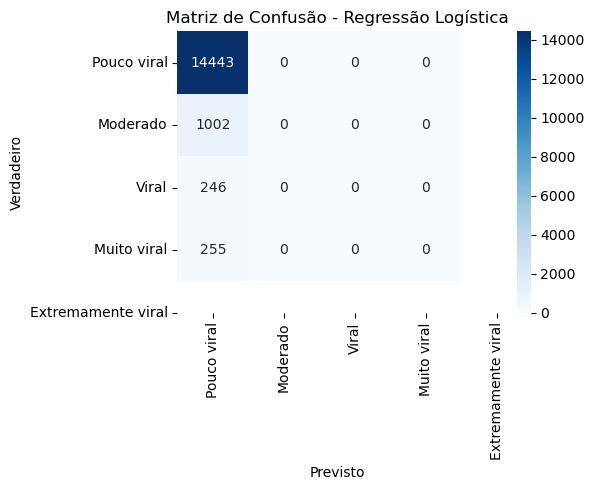

AUC (macro): 0.5759

=== Árvore de Decisão ===
Acurácia: 0.8415
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.92      0.92      0.92     14443
          Moderado       0.12      0.13      0.13      1002
             Viral       0.07      0.07      0.07       246
       Muito viral       0.09      0.09      0.09       255

          accuracy                           0.84     15946
         macro avg       0.30      0.30      0.30     15946
      weighted avg       0.85      0.84      0.84     15946



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


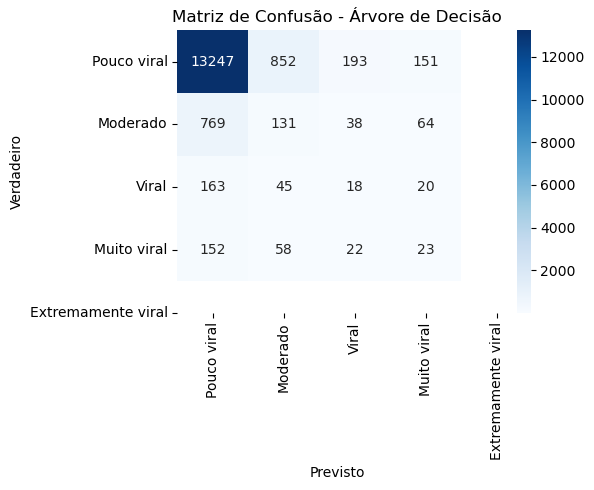

AUC (macro): 0.5494

=== Random Forest ===
Acurácia: 0.9064
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.92      0.99      0.96     14443
          Moderado       0.36      0.10      0.16      1002
             Viral       0.20      0.05      0.08       246
       Muito viral       0.26      0.09      0.14       255

          accuracy                           0.91     15946
         macro avg       0.44      0.31      0.33     15946
      weighted avg       0.87      0.91      0.88     15946



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


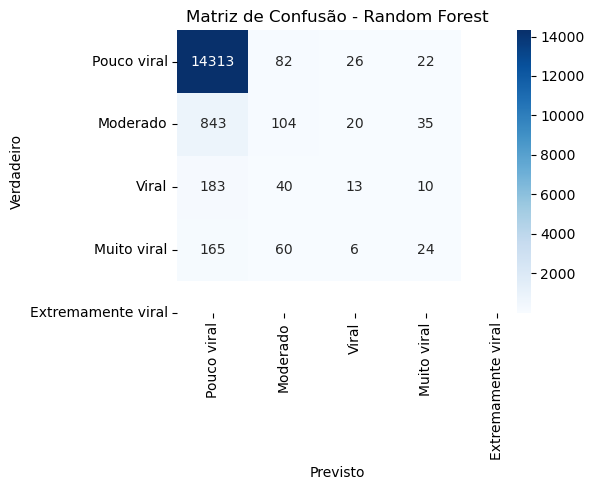

AUC (macro): 0.6603


In [31]:
classes = ["Pouco viral", "Moderado", "Viral", "Muito viral", "Extremamente viral"]
avaliar_modelos_multiclasse(X_train, X_test, y_train, y_test, nome_classes=classes)

In [32]:
y.value_counts()

viralidade_label
0    72213
1     5011
4     1272
3     1232
Name: count, dtype: int64

### f)  Regularização:  Com  regularização  (Ridge,  Lasso  ou  ElasticNet)

In [33]:
def avaliar_regularizacao_logistica_multiclasse(X_train, X_test, y_train, y_test, nome_classes=None):
    modelos = {
        "Ridge (L2)": LogisticRegression(penalty='l2', C=1.0, solver='saga', multi_class='multinomial', max_iter=1000),
        "Lasso (L1)": LogisticRegression(penalty='l1', C=1.0, solver='saga', multi_class='multinomial', max_iter=1000),
        "ElasticNet (L1 + L2)": LogisticRegression(penalty='elasticnet', C=1.0, solver='saga', l1_ratio=0.5, multi_class='multinomial', max_iter=1000)
    }

    # Classes presentes
    todas_classes = sorted(np.unique(np.concatenate([y_train, y_test])))
    if nome_classes is None:
        nome_classes = [f"Classe {i}" for i in todas_classes]

    for nome, modelo in modelos.items():
        print(f"\n=== {nome} ===")

        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)

        # Métricas
        print("Acurácia:", round(accuracy_score(y_test, y_pred), 4))
        print("Classification Report:")
        print(classification_report(y_test, y_pred, labels=todas_classes, target_names=nome_classes))

        # Matriz de confusão
        cm = confusion_matrix(y_test, y_pred, labels=todas_classes)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                    xticklabels=nome_classes,
                    yticklabels=nome_classes)
        plt.title(f"Matriz de Confusão - {nome}")
        plt.xlabel("Previsto")
        plt.ylabel("Verdadeiro")
        plt.tight_layout()
        plt.show()

        # AUC Multiclasse
        try:
            auc_macro = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
            print(f"AUC (macro): {auc_macro:.4f}")
        except Exception as e:
            print("AUC não pôde ser calculado:", e)


=== Ridge (L2) ===
Acurácia: 0.9057
Classification Report:
              precision    recall  f1-score   support

    Classe 0       0.91      1.00      0.95     14443
    Classe 1       0.00      0.00      0.00      1002
    Classe 3       0.00      0.00      0.00       246
    Classe 4       0.00      0.00      0.00       255

    accuracy                           0.91     15946
   macro avg       0.23      0.25      0.24     15946
weighted avg       0.82      0.91      0.86     15946



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

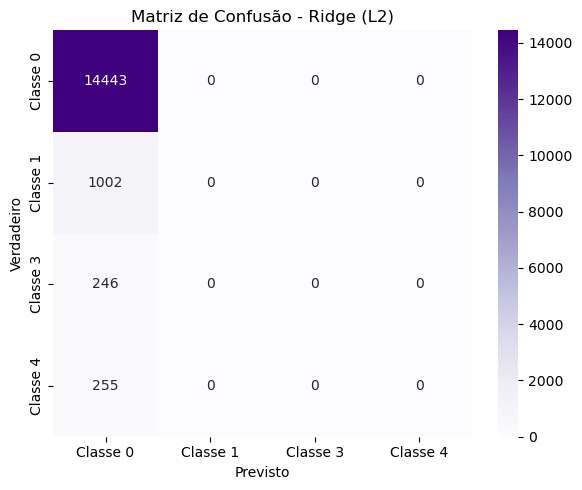

AUC (macro): 0.5759

=== Lasso (L1) ===
Acurácia: 0.9057
Classification Report:
              precision    recall  f1-score   support

    Classe 0       0.91      1.00      0.95     14443
    Classe 1       0.00      0.00      0.00      1002
    Classe 3       0.00      0.00      0.00       246
    Classe 4       0.00      0.00      0.00       255

    accuracy                           0.91     15946
   macro avg       0.23      0.25      0.24     15946
weighted avg       0.82      0.91      0.86     15946



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

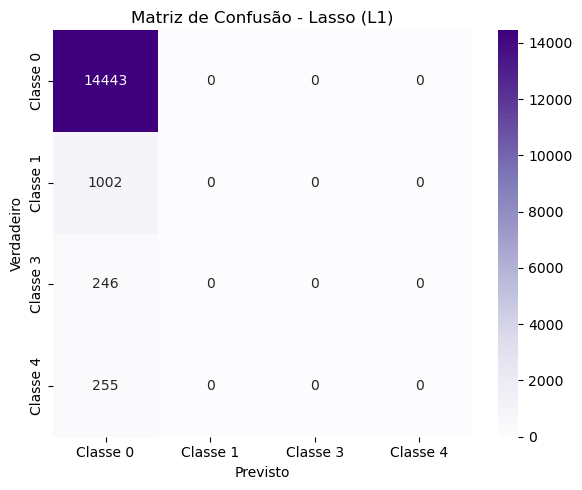

AUC (macro): 0.5759

=== ElasticNet (L1 + L2) ===
Acurácia: 0.9057
Classification Report:
              precision    recall  f1-score   support

    Classe 0       0.91      1.00      0.95     14443
    Classe 1       0.00      0.00      0.00      1002
    Classe 3       0.00      0.00      0.00       246
    Classe 4       0.00      0.00      0.00       255

    accuracy                           0.91     15946
   macro avg       0.23      0.25      0.24     15946
weighted avg       0.82      0.91      0.86     15946



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

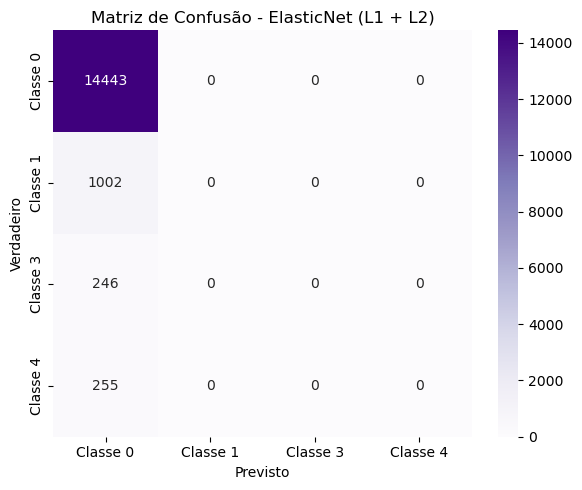

AUC (macro): 0.5759


In [34]:
avaliar_regularizacao_logistica_multiclasse(X_train, X_test, y_train, y_test)

### g)  Normalização dos dados: sem normalização, Z-Score

In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


=== Ridge (L2) ===
Acurácia: 0.9057
Classification Report:
              precision    recall  f1-score   support

    Classe 0       0.91      1.00      0.95     14443
    Classe 1       0.00      0.00      0.00      1002
    Classe 3       0.00      0.00      0.00       246
    Classe 4       0.00      0.00      0.00       255

    accuracy                           0.91     15946
   macro avg       0.23      0.25      0.24     15946
weighted avg       0.82      0.91      0.86     15946



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

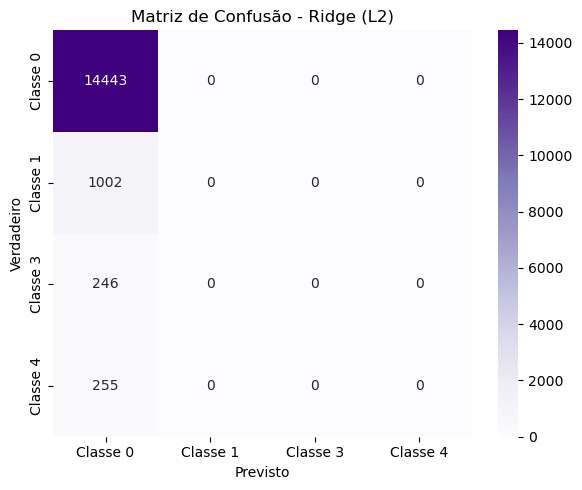

AUC (macro): 0.5759

=== Lasso (L1) ===
Acurácia: 0.9057
Classification Report:
              precision    recall  f1-score   support

    Classe 0       0.91      1.00      0.95     14443
    Classe 1       0.00      0.00      0.00      1002
    Classe 3       0.00      0.00      0.00       246
    Classe 4       0.00      0.00      0.00       255

    accuracy                           0.91     15946
   macro avg       0.23      0.25      0.24     15946
weighted avg       0.82      0.91      0.86     15946



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

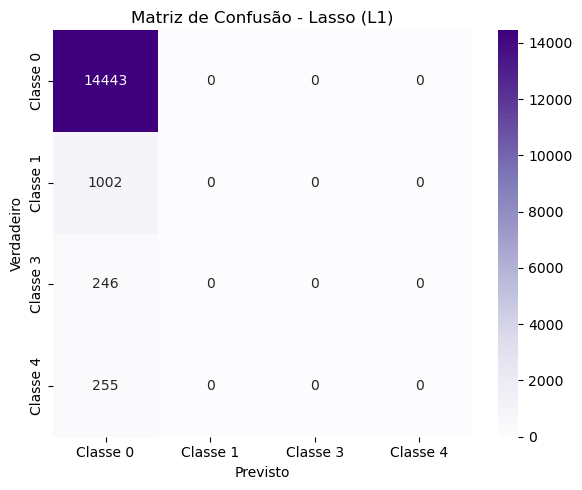

AUC (macro): 0.5759

=== ElasticNet (L1 + L2) ===
Acurácia: 0.9057
Classification Report:
              precision    recall  f1-score   support

    Classe 0       0.91      1.00      0.95     14443
    Classe 1       0.00      0.00      0.00      1002
    Classe 3       0.00      0.00      0.00       246
    Classe 4       0.00      0.00      0.00       255

    accuracy                           0.91     15946
   macro avg       0.23      0.25      0.24     15946
weighted avg       0.82      0.91      0.86     15946



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

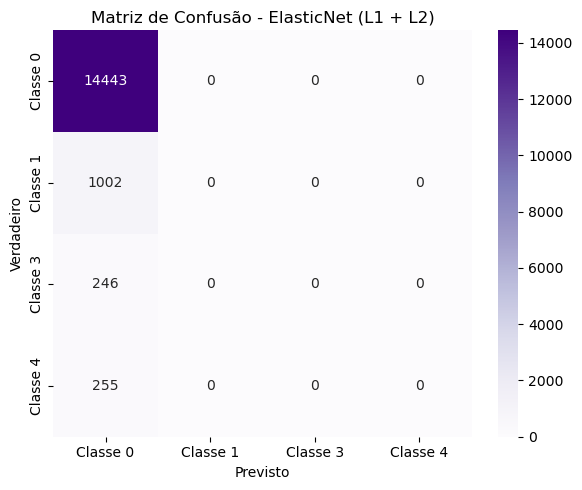

AUC (macro): 0.5759


In [36]:
avaliar_regularizacao_logistica_multiclasse(X_train_scaled, X_test_scaled, y_train, y_test)

### h)  Pré-processamento de dados

#### Oversampling

In [37]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Após SMOTE:", y_resampled.value_counts())

Após SMOTE: viralidade_label
0    72213
4    72213
1    72213
3    72213
Name: count, dtype: int64


In [38]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


=== Regressão Logística ===


/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


Acurácia: 0.3253
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.34      0.46      0.39     14443
          Moderado       0.31      0.33      0.32     14442
             Viral       0.40      0.08      0.13     14443
       Muito viral       0.31      0.43      0.36     14443

          accuracy                           0.33     57771
         macro avg       0.34      0.33      0.30     57771
      weighted avg       0.34      0.33      0.30     57771



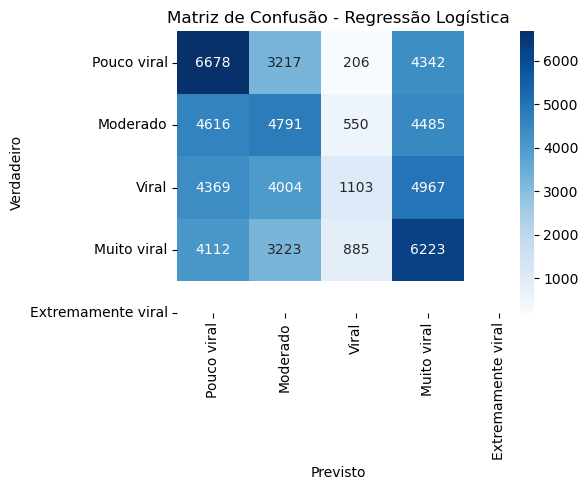

AUC (macro): 0.5866

=== Árvore de Decisão ===
Acurácia: 0.7203
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.68      0.64      0.66     14443
          Moderado       0.66      0.68      0.67     14442
             Viral       0.76      0.77      0.77     14443
       Muito viral       0.77      0.78      0.78     14443

          accuracy                           0.72     57771
         macro avg       0.72      0.72      0.72     57771
      weighted avg       0.72      0.72      0.72     57771



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


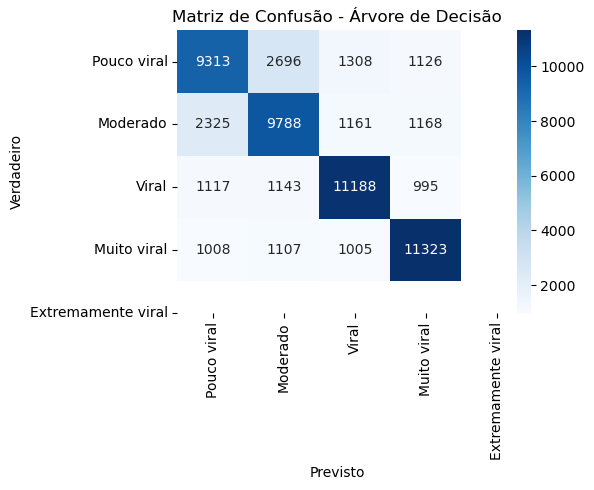

AUC (macro): 0.8135

=== Random Forest ===
Acurácia: 0.7556
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.70      0.70      0.70     14443
          Moderado       0.72      0.69      0.70     14442
             Viral       0.79      0.81      0.80     14443
       Muito viral       0.81      0.82      0.81     14443

          accuracy                           0.76     57771
         macro avg       0.75      0.76      0.76     57771
      weighted avg       0.75      0.76      0.76     57771



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


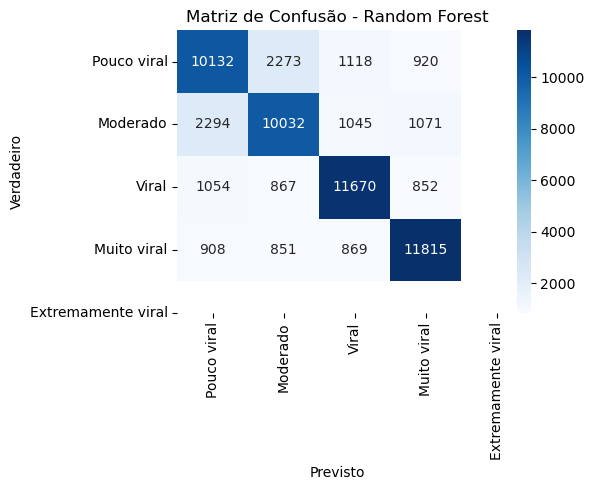

AUC (macro): 0.9205


In [39]:
classes = ["Pouco viral", "Moderado", "Viral", "Muito viral", "Extremamente viral"]
avaliar_modelos_multiclasse(X_train_smote, X_test_smote, y_train_smote, y_test_smote, nome_classes=classes)

#### Undersampling

In [41]:
# Juntar X e y em um DataFrame
df_bal = pd.concat([pd.DataFrame(X), pd.Series(y, name='target')], axis=1)

# Identificar a quantidade mínima entre as classes
min_class_size = df_bal['target'].value_counts().min()

# Undersample por classe
dfs_undersampled = []
for classe, df_classe in df_bal.groupby('target'):
    df_amostrado = resample(df_classe, replace=False,
                            n_samples=min_class_size,
                            random_state=42)
    dfs_undersampled.append(df_amostrado)

# Concatenar tudo e embaralhar
df_downsampled = pd.concat(dfs_undersampled).sample(frac=1, random_state=42)

# Separar X e y
X_downsampled = df_downsampled.drop(columns=['target']).values
y_downsampled = df_downsampled['target'].values

# Verificar distribuição final
print("Após undersampling:")
print(pd.Series(y_downsampled).value_counts().sort_index())

Após undersampling:
0    1232
1    1232
3    1232
4    1232
Name: count, dtype: int64


In [44]:
X_train_dwnsample, X_test_dwnsample, y_train_dwnsample, y_test_dwnsample = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42, stratify=y_downsampled)


=== Regressão Logística ===
Acurácia: 0.2779
Classification Report:
              precision    recall  f1-score   support

    Classe 0       0.27      0.43      0.33       247
    Classe 1       0.31      0.30      0.31       246
    Classe 3       0.29      0.11      0.15       247
    Classe 4       0.26      0.28      0.27       246

    accuracy                           0.28       986
   macro avg       0.28      0.28      0.26       986
weighted avg       0.28      0.28      0.26       986



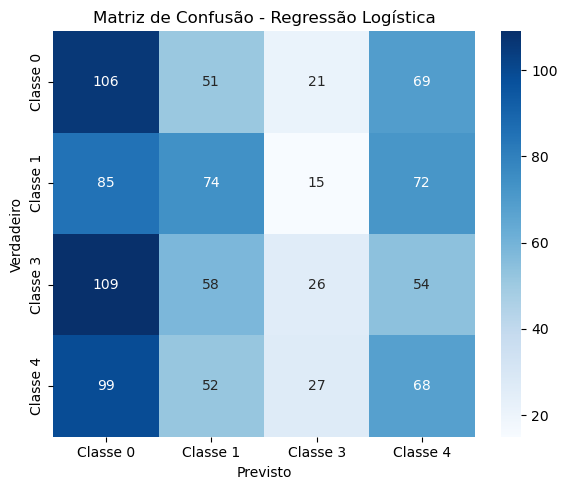

AUC (macro): 0.5385

=== Árvore de Decisão ===
Acurácia: 0.2982
Classification Report:
              precision    recall  f1-score   support

    Classe 0       0.34      0.30      0.32       247
    Classe 1       0.25      0.28      0.26       246
    Classe 3       0.27      0.26      0.26       247
    Classe 4       0.35      0.35      0.35       246

    accuracy                           0.30       986
   macro avg       0.30      0.30      0.30       986
weighted avg       0.30      0.30      0.30       986



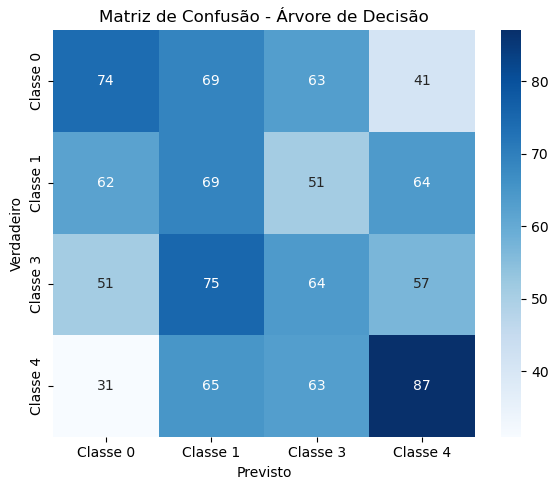

AUC (macro): 0.5321

=== Random Forest ===
Acurácia: 0.3185
Classification Report:
              precision    recall  f1-score   support

    Classe 0       0.36      0.43      0.39       247
    Classe 1       0.21      0.19      0.20       246
    Classe 3       0.29      0.24      0.26       247
    Classe 4       0.40      0.41      0.41       246

    accuracy                           0.32       986
   macro avg       0.31      0.32      0.31       986
weighted avg       0.31      0.32      0.31       986



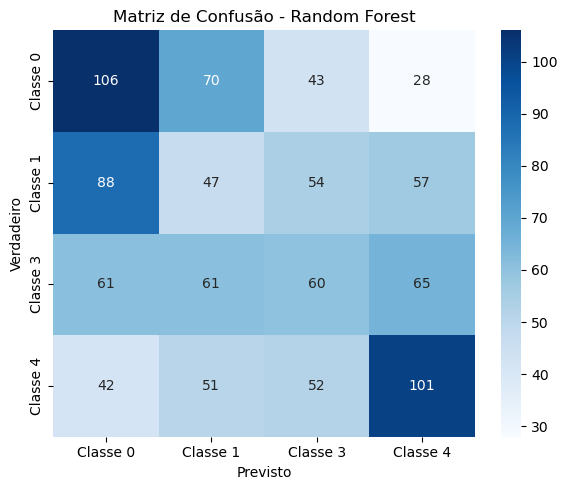

AUC (macro): 0.5797


In [45]:
avaliar_modelos_multiclasse(X_train_dwnsample, X_test_dwnsample, y_train_dwnsample, y_test_dwnsample)

### i)  Embedding: BOW, TF-IDF, Word2Vec; 

In [46]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/guilherme-
[nltk_data]     sales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/guilherme-
[nltk_data]     sales/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [52]:
stop_words = set(stopwords.words('portuguese')) | set(stopwords.words('english'))

In [50]:
min_class_size = df['viralidade_label'].value_counts().min()

df_balanceado = pd.concat([
    df[df['viralidade_label'] == classe].sample(min_class_size, random_state=42)
    for classe in df['viralidade_label'].unique()
])

df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

print("Distribuição balanceada:")
print(df_balanceado['viralidade_label'].value_counts().sort_index())

Distribuição balanceada:
viralidade_label
0    2190
1    2190
3    2190
4    2190
Name: count, dtype: int64


In [53]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return " ".join(tokens)

df_balanceado['texto_proc'] = df_balanceado['texto_limpo'].fillna("").apply(preprocess_text)

In [57]:
X_train_text, X_test_text, y_train, y_test = train_test_split(df_balanceado['texto_proc'], df_balanceado['viralidade_label'], test_size=0.2, random_state=42, stratify=df_balanceado['viralidade_label'])

In [58]:
# === Bag of Words ===
bow_vectorizer = CountVectorizer(max_features=5000) 
X_train_bow = bow_vectorizer.fit_transform(X_train_text)
X_test_bow = bow_vectorizer.transform(X_test_text)

# === TF-IDF ===
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

In [59]:
tokens_list = df_balanceado['texto_proc'].apply(lambda x: x.split()).tolist()
w2v_model = Word2Vec(sentences=tokens_list, vector_size=100, window=5, min_count=5, workers=4)

# Função para vetor médio
def vectorize_w2v(tokens, model, size=100):
    vecs = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(size)

X_w2v = df_balanceado['texto_proc'].apply(lambda t: vectorize_w2v(t.split(), w2v_model)).tolist()
X_w2v = np.array(X_w2v)

# Split
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, df_balanceado['viralidade_label'], test_size=0.2, random_state=42, stratify=df_balanceado['viralidade_label'])


=== Regressão Logística ===
Acurácia: 0.3493
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.40      0.48      0.44       438
          Moderado       0.27      0.24      0.25       438
             Viral       0.31      0.30      0.30       438
       Muito viral       0.40      0.38      0.39       438

          accuracy                           0.35      1752
         macro avg       0.35      0.35      0.35      1752
      weighted avg       0.35      0.35      0.35      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


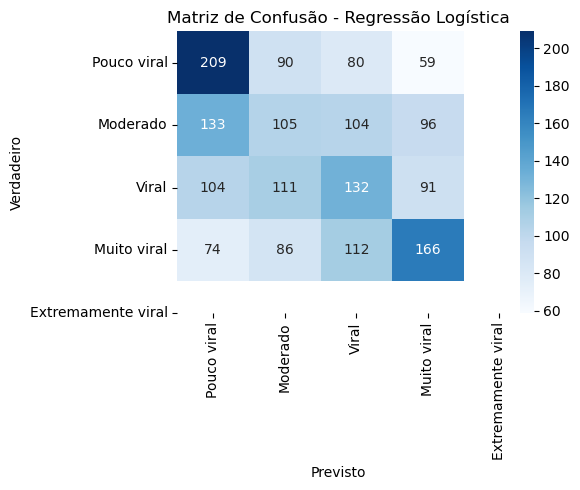

AUC (macro): 0.6092

=== Árvore de Decisão ===
Acurácia: 0.3145
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.38      0.36      0.37       438
          Moderado       0.25      0.25      0.25       438
             Viral       0.28      0.32      0.30       438
       Muito viral       0.36      0.33      0.34       438

          accuracy                           0.31      1752
         macro avg       0.32      0.31      0.32      1752
      weighted avg       0.32      0.31      0.32      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


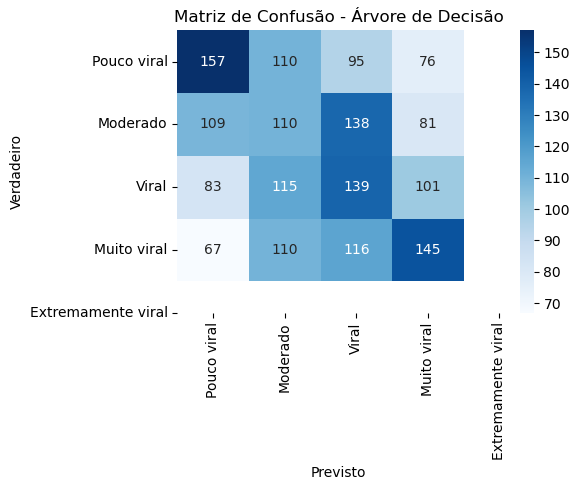

AUC (macro): 0.5433

=== Random Forest ===
Acurácia: 0.3550
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.41      0.49      0.44       438
          Moderado       0.28      0.21      0.24       438
             Viral       0.29      0.30      0.29       438
       Muito viral       0.42      0.42      0.42       438

          accuracy                           0.36      1752
         macro avg       0.35      0.36      0.35      1752
      weighted avg       0.35      0.36      0.35      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


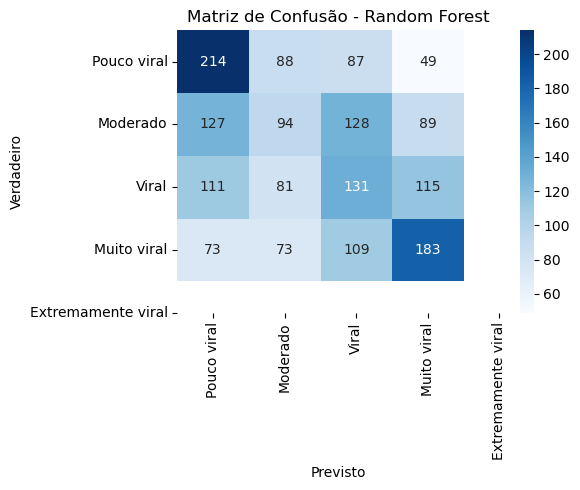

AUC (macro): 0.6082


In [60]:
classes = ["Pouco viral", "Moderado", "Viral", "Muito viral", "Extremamente viral"]
avaliar_modelos_multiclasse(X_train_tfidf, X_test_tfidf, y_train, y_test, nome_classes=classes)


=== Regressão Logística ===
Acurácia: 0.3345
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.40      0.40      0.40       438
          Moderado       0.26      0.24      0.25       438
             Viral       0.29      0.30      0.30       438
       Muito viral       0.38      0.39      0.39       438

          accuracy                           0.33      1752
         macro avg       0.33      0.33      0.33      1752
      weighted avg       0.33      0.33      0.33      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


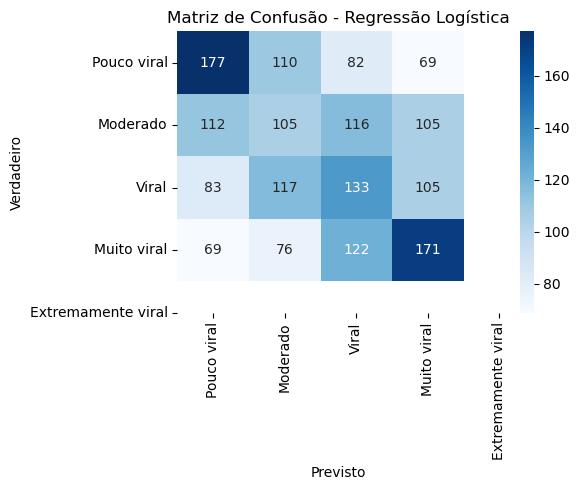

AUC (macro): 0.5872

=== Árvore de Decisão ===
Acurácia: 0.2979
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.34      0.32      0.33       438
          Moderado       0.22      0.21      0.21       438
             Viral       0.26      0.26      0.26       438
       Muito viral       0.37      0.40      0.39       438

          accuracy                           0.30      1752
         macro avg       0.30      0.30      0.30      1752
      weighted avg       0.30      0.30      0.30      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


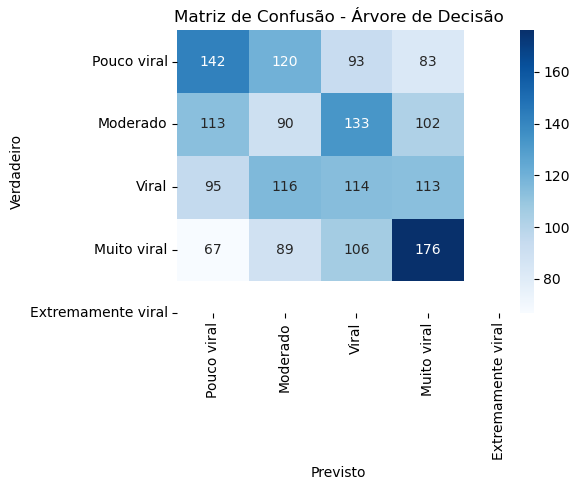

AUC (macro): 0.5289

=== Random Forest ===
Acurácia: 0.3402
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.43      0.44      0.44       438
          Moderado       0.24      0.16      0.19       438
             Viral       0.28      0.31      0.30       438
       Muito viral       0.37      0.45      0.41       438

          accuracy                           0.34      1752
         macro avg       0.33      0.34      0.33      1752
      weighted avg       0.33      0.34      0.33      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


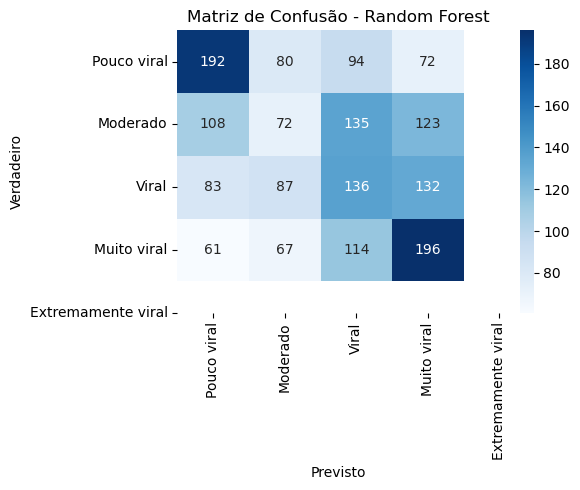

AUC (macro): 0.5975


In [63]:
# Usando BoW
avaliar_modelos_multiclasse(X_train_bow, X_test_bow, y_train, y_test, classes)


=== Regressão Logística ===
Acurácia: 0.2997
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.32      0.60      0.42       438
          Moderado       0.26      0.20      0.22       438
             Viral       0.26      0.18      0.21       438
       Muito viral       0.35      0.22      0.27       438

          accuracy                           0.30      1752
         macro avg       0.29      0.30      0.28      1752
      weighted avg       0.29      0.30      0.28      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


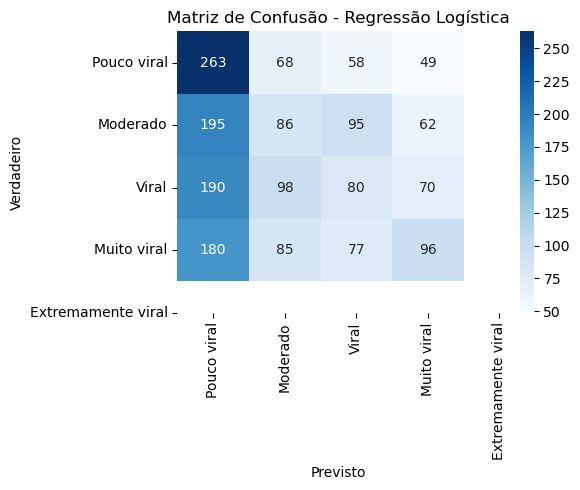

AUC (macro): 0.5673

=== Árvore de Decisão ===
Acurácia: 0.2905
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.32      0.33      0.33       438
          Moderado       0.27      0.27      0.27       438
             Viral       0.24      0.25      0.24       438
       Muito viral       0.32      0.32      0.32       438

          accuracy                           0.29      1752
         macro avg       0.29      0.29      0.29      1752
      weighted avg       0.29      0.29      0.29      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


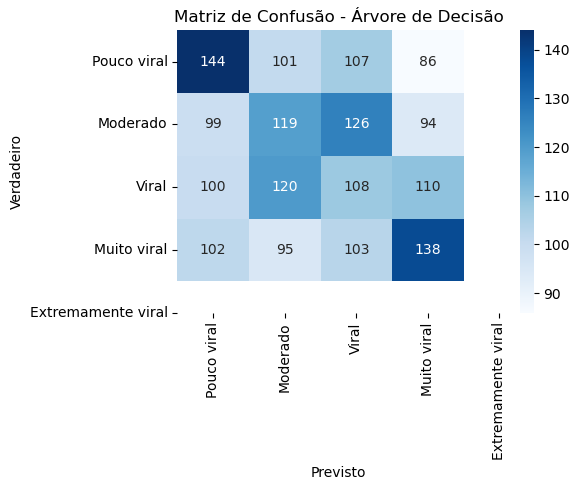

AUC (macro): 0.5241

=== Random Forest ===
Acurácia: 0.3293
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.38      0.50      0.43       438
          Moderado       0.27      0.28      0.27       438
             Viral       0.27      0.23      0.25       438
       Muito viral       0.40      0.31      0.35       438

          accuracy                           0.33      1752
         macro avg       0.33      0.33      0.32      1752
      weighted avg       0.33      0.33      0.32      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


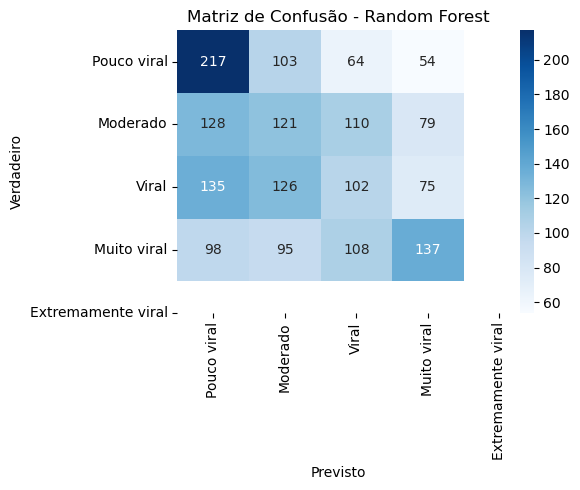

AUC (macro): 0.5844


In [64]:
# Usando Word2Vec
avaliar_modelos_multiclasse(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v, classes)

### j)  N-Gramas: unigramas, bigramas, trigramas;

In [65]:
def gerar_tfidf_ngramas(corpus_treino, corpus_teste, ngrama=(1, 1), max_features=5000):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngrama, max_features=max_features)
    X_train = tfidf_vectorizer.fit_transform(corpus_treino)
    X_test = tfidf_vectorizer.transform(corpus_teste)
    return X_train, X_test, tfidf_vectorizer


In [66]:
X_train_txt, X_test_txt, y_train, y_test = train_test_split(df_balanceado['texto_proc'], df_balanceado['viralidade_label'], test_size=0.2, random_state=42, stratify=df_balanceado['viralidade_label'])



=== Regressão Logística ===
Acurácia: 0.3493
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.40      0.48      0.44       438
          Moderado       0.27      0.24      0.25       438
             Viral       0.31      0.30      0.30       438
       Muito viral       0.40      0.38      0.39       438

          accuracy                           0.35      1752
         macro avg       0.35      0.35      0.35      1752
      weighted avg       0.35      0.35      0.35      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


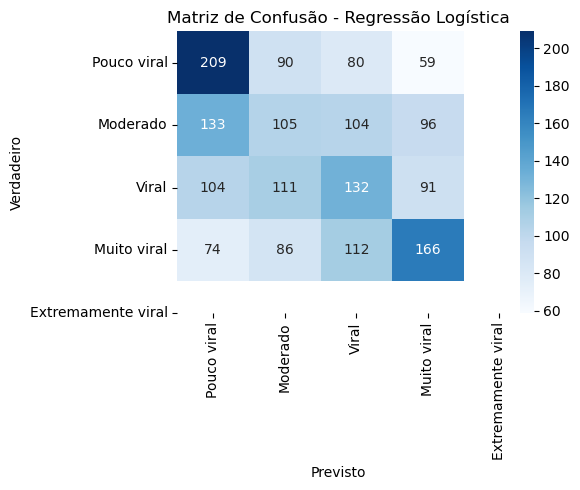

AUC (macro): 0.6092

=== Árvore de Decisão ===
Acurácia: 0.3145
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.38      0.36      0.37       438
          Moderado       0.25      0.25      0.25       438
             Viral       0.28      0.32      0.30       438
       Muito viral       0.36      0.33      0.34       438

          accuracy                           0.31      1752
         macro avg       0.32      0.31      0.32      1752
      weighted avg       0.32      0.31      0.32      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


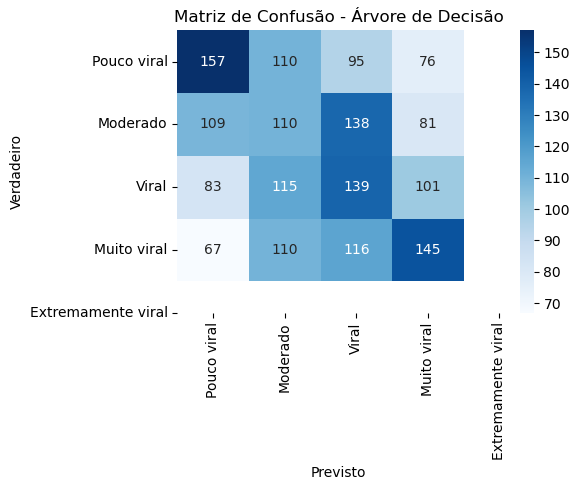

AUC (macro): 0.5433

=== Random Forest ===
Acurácia: 0.3550
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.41      0.49      0.44       438
          Moderado       0.28      0.21      0.24       438
             Viral       0.29      0.30      0.29       438
       Muito viral       0.42      0.42      0.42       438

          accuracy                           0.36      1752
         macro avg       0.35      0.36      0.35      1752
      weighted avg       0.35      0.36      0.35      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


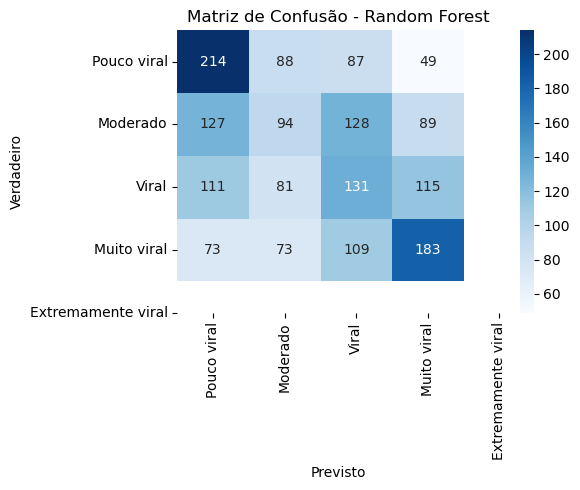

AUC (macro): 0.6082


In [67]:
X_train_uni, X_test_uni, _ = gerar_tfidf_ngramas(X_train_txt, X_test_txt, ngrama=(1,1))
avaliar_modelos_multiclasse(X_train_uni, X_test_uni, y_train, y_test, classes)


=== Regressão Logística ===
Acurácia: 0.3482
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.41      0.47      0.44       438
          Moderado       0.26      0.24      0.25       438
             Viral       0.31      0.30      0.30       438
       Muito viral       0.39      0.38      0.39       438

          accuracy                           0.35      1752
         macro avg       0.34      0.35      0.35      1752
      weighted avg       0.34      0.35      0.35      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


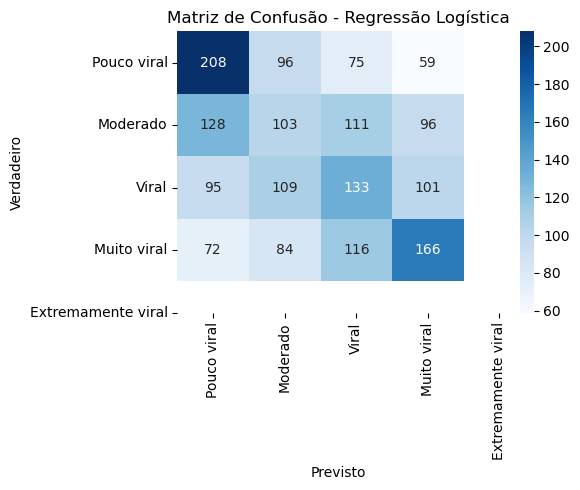

AUC (macro): 0.6084

=== Árvore de Decisão ===
Acurácia: 0.3076
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.37      0.34      0.35       438
          Moderado       0.27      0.27      0.27       438
             Viral       0.26      0.28      0.27       438
       Muito viral       0.35      0.34      0.34       438

          accuracy                           0.31      1752
         macro avg       0.31      0.31      0.31      1752
      weighted avg       0.31      0.31      0.31      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


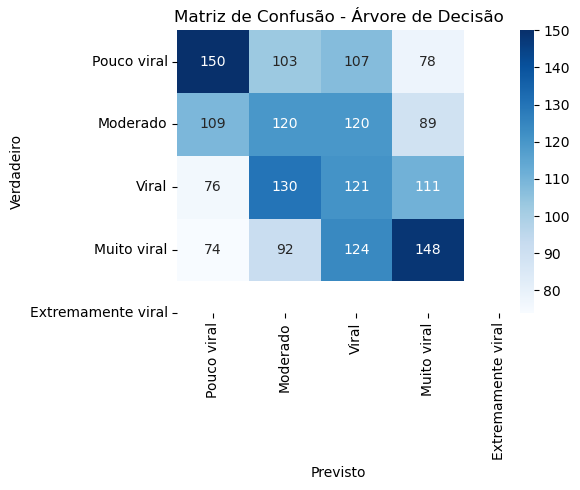

AUC (macro): 0.5380

=== Random Forest ===
Acurácia: 0.3527
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.41      0.51      0.45       438
          Moderado       0.27      0.22      0.24       438
             Viral       0.30      0.29      0.29       438
       Muito viral       0.40      0.40      0.40       438

          accuracy                           0.35      1752
         macro avg       0.35      0.35      0.35      1752
      weighted avg       0.35      0.35      0.35      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


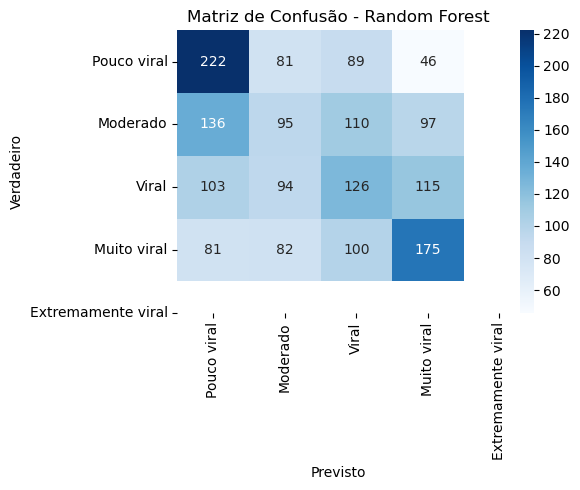

AUC (macro): 0.6061


In [68]:
X_train_bi, X_test_bi, _ = gerar_tfidf_ngramas(X_train_txt, X_test_txt, ngrama=(1,2))
avaliar_modelos_multiclasse(X_train_bi, X_test_bi, y_train, y_test, classes)



=== Regressão Logística ===
Acurácia: 0.3499
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.42      0.48      0.44       438
          Moderado       0.28      0.25      0.26       438
             Viral       0.30      0.29      0.30       438
       Muito viral       0.39      0.38      0.39       438

          accuracy                           0.35      1752
         macro avg       0.35      0.35      0.35      1752
      weighted avg       0.35      0.35      0.35      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


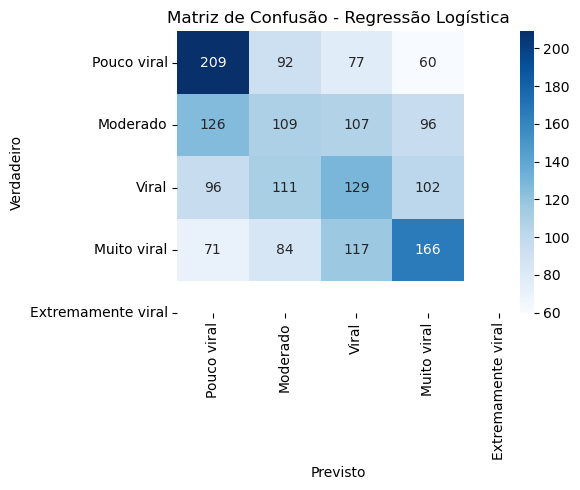

AUC (macro): 0.6080

=== Árvore de Decisão ===
Acurácia: 0.3076
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.36      0.33      0.35       438
          Moderado       0.27      0.27      0.27       438
             Viral       0.26      0.30      0.28       438
       Muito viral       0.34      0.33      0.34       438

          accuracy                           0.31      1752
         macro avg       0.31      0.31      0.31      1752
      weighted avg       0.31      0.31      0.31      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


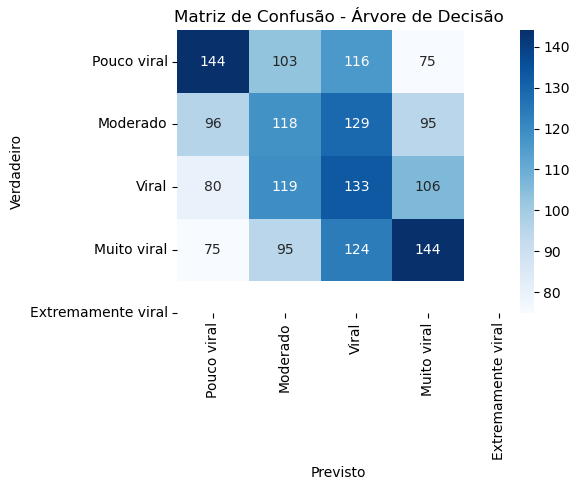

AUC (macro): 0.5375

=== Random Forest ===
Acurácia: 0.3499
Classification Report:
                    precision    recall  f1-score   support

       Pouco viral       0.41      0.50      0.45       438
          Moderado       0.26      0.21      0.23       438
             Viral       0.29      0.28      0.29       438
       Muito viral       0.41      0.42      0.41       438

          accuracy                           0.35      1752
         macro avg       0.34      0.35      0.34      1752
      weighted avg       0.34      0.35      0.34      1752



/home/guilherme-sales/miniconda3/envs/ds_text/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2561: UserWarning: labels size, 4, does not match size of target_names, 5
  warnings.warn(


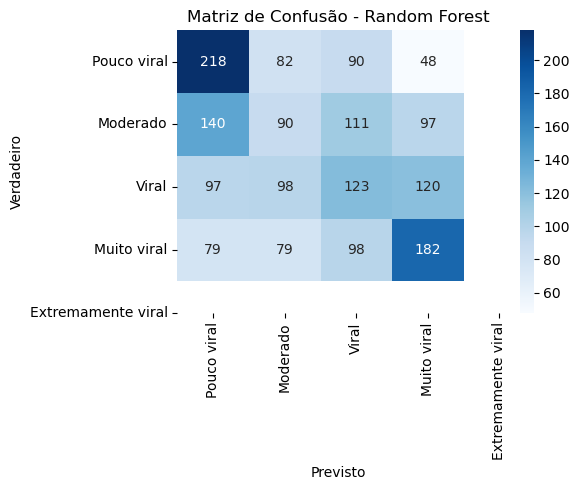

AUC (macro): 0.6055


In [69]:
X_train_tri, X_test_tri, _ = gerar_tfidf_ngramas(X_train_txt, X_test_txt, ngrama=(1,3))
avaliar_modelos_multiclasse(X_train_tri, X_test_tri, y_train, y_test, classes)


### k)  Treinamento, Validação e Teste: Outer K-Fold Cross-Validation

In [85]:
def outer_kfold_cross_validation(texts, labels, ngram_range=(1, 1), k=5, max_features=5000):
    # Vetorização
    tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
    X_all = tfidf.fit_transform(texts)
    y_all = np.array(labels)

    # Divisão dos folds
    outer_kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Modelos
    modelos = {
        "LogReg": LogisticRegression(max_iter=1000, random_state=42),
        "Tree": DecisionTreeClassifier(random_state=42),
        "RF": RandomForestClassifier(n_estimators=100, random_state=42)
    }

    resultados = {nome: [] for nome in modelos}

    for fold, (train_idx, test_idx) in enumerate(outer_kf.split(X_all)):
        print(f"\nFold {fold + 1}/{k}")
        X_train, X_test = X_all[train_idx], X_all[test_idx]
        y_train, y_test = y_all[train_idx], y_all[test_idx]

        for nome, modelo in modelos.items():
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)
            y_proba = modelo.predict_proba(X_test)

            acc = accuracy_score(y_test, y_pred)

            try:
                auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
            except ValueError as e:
                print(f"Erro ao calcular AUC para {nome}: {e}")
                auc = np.nan

            resultados[nome].append((acc, auc))
            print(f"{nome}: Acc = {acc:.4f}, AUC = {auc:.4f}")

    # Resultados médios
    print("\nResultados Médios:")
    for nome in modelos:
        accs, aucs = zip(*resultados[nome])
        print(f"{nome}: Média Acc = {np.nanmean(accs):.4f}, Média AUC = {np.nanmean(aucs):.4f}")

In [89]:
def outer_kfold_numerico(X, y, k=5):
    modelos = {
        "LogReg": LogisticRegression(max_iter=1000, random_state=42),
        "Tree": DecisionTreeClassifier(random_state=42),
        "RF": RandomForestClassifier(n_estimators=100, random_state=42)
    }

    resultados = {nome: [] for nome in modelos}
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"\nFold {fold+1}/{k}")

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Normalização (z-score)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for nome, modelo in modelos.items():
            modelo.fit(X_train_scaled, y_train)
            y_pred = modelo.predict(X_test_scaled)

            try:
                y_proba = modelo.predict_proba(X_test_scaled)
                auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
            except Exception as e:
                print(f"AUC indisponível para {nome}: {e}")
                auc = np.nan

            acc = accuracy_score(y_test, y_pred)
            resultados[nome].append((acc, auc))

            print(f"{nome}: acc = {acc:.4f}, AUC = {auc:.4f}")

    # Médias finais
    print("\nResultados Médios:")
    for nome in modelos:
        accs, aucs = zip(*resultados[nome])
        print(f"{nome}: Média Acc = {np.mean(accs):.4f}, Média AUC = {np.nanmean(aucs):.4f}")

In [87]:
df_balanceado['viralidade_label'].value_counts()

viralidade_label
3    2190
4    2190
1    2190
0    2190
Name: count, dtype: int64

In [86]:
outer_kfold_cross_validation(df_balanceado['texto_proc'], df_balanceado['viralidade_label'], ngram_range=(1,2))


Fold 1/5
LogReg: Acc = 0.3408, AUC = 0.6089
Tree: Acc = 0.3042, AUC = 0.5345
RF: Acc = 0.3510, AUC = 0.6032

Fold 2/5
LogReg: Acc = 0.3522, AUC = 0.6088
Tree: Acc = 0.3134, AUC = 0.5414
RF: Acc = 0.3567, AUC = 0.6135

Fold 3/5
LogReg: Acc = 0.3516, AUC = 0.6185
Tree: Acc = 0.3048, AUC = 0.5336
RF: Acc = 0.3470, AUC = 0.6052

Fold 4/5
LogReg: Acc = 0.3390, AUC = 0.6056
Tree: Acc = 0.3065, AUC = 0.5354
RF: Acc = 0.3545, AUC = 0.6121

Fold 5/5
LogReg: Acc = 0.3533, AUC = 0.6263
Tree: Acc = 0.3265, AUC = 0.5496
RF: Acc = 0.3419, AUC = 0.6072

Resultados Médios:
LogReg: Média Acc = 0.3474, Média AUC = 0.6136
Tree: Média Acc = 0.3111, Média AUC = 0.5389
RF: Média Acc = 0.3502, Média AUC = 0.6082


In [90]:
X_smote = pd.concat([X_train_smote, X_test_smote]).reset_index(drop=True)
y_smote = pd.concat([y_train_smote, y_test_smote]).reset_index(drop=True)

In [91]:
outer_kfold_numerico(X_smote.values, y_smote.values, 5)


Fold 1/5
LogReg: acc = 0.3241, AUC = 0.5873
Tree: acc = 0.7183, AUC = 0.8120
RF: acc = 0.7562, AUC = 0.9188

Fold 2/5
LogReg: acc = 0.3266, AUC = 0.5851
Tree: acc = 0.7149, AUC = 0.8100
RF: acc = 0.7553, AUC = 0.9192

Fold 3/5
LogReg: acc = 0.3257, AUC = 0.5851
Tree: acc = 0.7201, AUC = 0.8135
RF: acc = 0.7585, AUC = 0.9201

Fold 4/5
LogReg: acc = 0.3253, AUC = 0.5855
Tree: acc = 0.7160, AUC = 0.8108
RF: acc = 0.7547, AUC = 0.9191

Fold 5/5
LogReg: acc = 0.3240, AUC = 0.5827
Tree: acc = 0.7151, AUC = 0.8102
RF: acc = 0.7557, AUC = 0.9189

Resultados Médios:
LogReg: Média Acc = 0.3251, Média AUC = 0.5851
Tree: Média Acc = 0.7169, Média AUC = 0.8113
RF: Média Acc = 0.7561, Média AUC = 0.9192
